# Preprocessing (Feature Engineering in ML)
Basic steps in creating a data processing
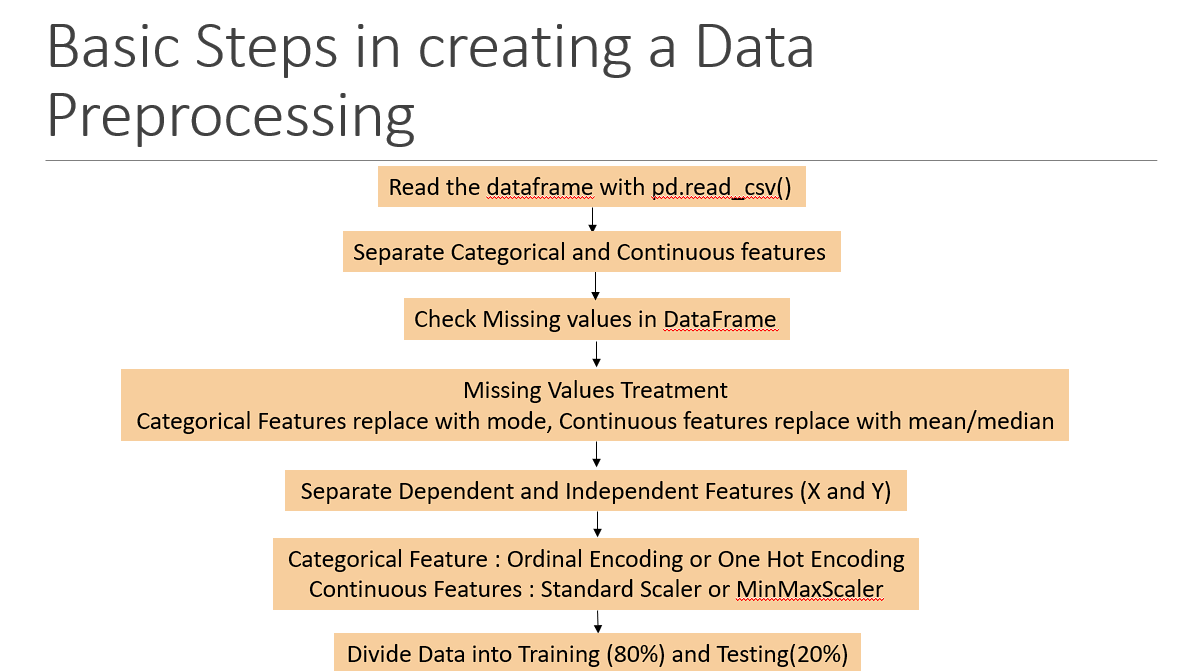

In [ ]:
from warnings import filterwarnings
filterwarnings ('ignore')

# step 1 Read the data sets

In [4]:
import pandas as pd
A = pd.read_csv('Cars93.csv',na_values=['','NA'],keep_default_na=False)

In [5]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


# Step 2= perform the basic data quality

In [7]:
A.isna().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [8]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [9]:
A.duplicated().sum()

0

# drop the duplicate entries


A = A.drop_duplicates(keep = 'first)

In [11]:
A = A.drop_duplicates(keep = 'first')


# Step 3 : Seprate categorical (text)and Continuous(Number)features

In [14]:
A.dtypes

id                      int64
Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Weight                  int64
Origin                 object
Make                   object
dtype: object

In [16]:
cat= list(A.columns[A.dtypes=='object'])
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [19]:
con=list(A.columns[A.dtypes!='object'])
con

['id',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

# Step no. 4 = Replace the misssing values
1. Caagorical (text) - mode
2. Continous (num) - mean/mediun

In [20]:
A['AirBags'].value_counts()

AirBags
Driver only           42
None                  33
Driver & Passenger    14
Name: count, dtype: int64

In [21]:
A['AirBags'].mode()[0]

'Driver only'

In [22]:
A['AirBags'].mode()

0    Driver only
Name: AirBags, dtype: object

In [23]:
A['Rear.seat.room'].mean()

27.82967032967033

In [24]:
A['Luggage.room'].median()

14.0

### Function called as A.fillna(value)

In [31]:
def replacer(A):
    cat= list(A.columns[A.dtypes=='object'])
    for i in A.columns:
        if i in cat:
            md=A[i].mode()[0]
            A[i] = A[i].fillna(md)
        else:
            mn=A[i].mean()
            A[i] = A[i].fillna(mn)
    print('missing value replaced')

In [32]:
replacer(A)

missing value replaced


In [33]:
A.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [34]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver only,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [35]:
A.to_csv('Cars93clean.csv', index=False)